<a href="https://colab.research.google.com/github/spr-att/spr-att.github.io/blob/main/Kagglemovies_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.lib.histograms import histogram
import matplotlib.patches as mpatches
import matplotlib.colors as colors

In [ ]:
def make_boxplot_viz(values, labels, figsize = [12,6], regsize = 12, labsize = 14, titlsize = 16, title = '', xlim = [], xtick_list = [], xlabel='', color1 = '#DDEDAA', color2 = '#46343F', grid = True, spines = False, filename = 'plot.png'):
    fig, ax = plt.subplots(figsize = figsize)
    ax.boxplot(values, labels = labels, vert = False, boxprops=dict(facecolor=color1, color=color2), patch_artist = True, medianprops=dict(color=color2), flierprops=dict(marker='s', markeredgecolor = color2, markerfacecolor = color1, markersize=4))
    #title
    ax.set_title(title, fontsize = titlsize, pad = 20)
    #xlabel
    ax.set_xlabel(xlabel, fontsize = labsize, labelpad = 20)
    #x tick values
    if xtick_list != []:
        ax.set_xticks(xtick_list)
    #grid
    if grid is True:
        ax.grid(axis = 'x', color = 'black', linewidth = 0.2, linestyle = '-.')
    #spines
    if spines is False:
        [ax.spines[i].set_visible(False) for i in ax.spines]
    #x limit
    if xlim != []:
        ax.set_xlim(xlim)
    #x tick size
    ax.tick_params(axis = 'x', size = 0, labelsize = regsize)
    ax.tick_params(axis = 'y', size = 0, labelsize = labsize)
    plt.savefig(filename, bbox_inches = 'tight')
    return plt.show()

In [ ]:
#read in data
data = pd.read_csv('/content/drive/MyDrive/DataVis/movies_metadata_cleaner.csv')

In [ ]:
#look at movies dataframe
data

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0
1,1,65000000,Adventure;Fantasy;Family,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",US;,1995-12-15,262797249.0,104.0,English;Français,Jumanji,6.9,2413.0
2,2,0,Romance;Comedy,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",US;,1995-12-22,0.0,101.0,English,Grumpier Old Men,6.5,92.0
3,3,16000000,Comedy;Drama;Romance,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,US;,1995-12-22,81452156.0,127.0,English,Waiting to Exhale,6.1,34.0
4,4,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",US;,1995-02-10,76578911.0,106.0,English,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44420,45460,0,Drama;Action;Romance,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",CA;DE;GB;US;,1991-05-13,0.0,104.0,English,Robin Hood,5.7,26.0
44421,45462,0,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",PH;,2011-11-17,0.0,360.0,NaN,Century of Birthing,9.0,3.0
44422,45463,0,Action;Drama;Thriller,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",US;,2003-08-01,0.0,90.0,English,Betrayal,3.8,6.0
44423,45464,0,NaN,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",RU;,1917-10-21,0.0,87.0,NaN,Satan Triumphant,0.0,0.0


In [ ]:
budget = data['budget'].tolist()
scaler = (10**6)
#divide budget values by scaler
scaled_budget = np.divide(budget, scaler)
scaled_budget

array([30., 65.,  0., ...,  0.,  0.,  0.])

In [ ]:
#add scaled_budget column to movies df
data['scaled_budget'] = scaled_budget
data

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,30.0
1,1,65000000,Adventure;Fantasy;Family,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",US;,1995-12-15,262797249.0,104.0,English;Français,Jumanji,6.9,2413.0,65.0
2,2,0,Romance;Comedy,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",US;,1995-12-22,0.0,101.0,English,Grumpier Old Men,6.5,92.0,0.0
3,3,16000000,Comedy;Drama;Romance,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,US;,1995-12-22,81452156.0,127.0,English,Waiting to Exhale,6.1,34.0,16.0
4,4,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",US;,1995-02-10,76578911.0,106.0,English,Father of the Bride Part II,5.7,173.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44420,45460,0,Drama;Action;Romance,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",CA;DE;GB;US;,1991-05-13,0.0,104.0,English,Robin Hood,5.7,26.0,0.0
44421,45462,0,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",PH;,2011-11-17,0.0,360.0,NaN,Century of Birthing,9.0,3.0,0.0
44422,45463,0,Action;Drama;Thriller,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",US;,2003-08-01,0.0,90.0,English,Betrayal,3.8,6.0,0.0
44423,45464,0,NaN,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",RU;,1917-10-21,0.0,87.0,NaN,Satan Triumphant,0.0,0.0,0.0


In [ ]:
revenue = data['revenue'].tolist()
scaler = (10**6)
#divide budget values by scaler
scaled_revenue = np.divide(revenue, scaler)
scaled_revenue

array([373.554033, 262.797249,   0.      , ...,   0.      ,   0.      ,
         0.      ])

In [ ]:
#add scaled_revenue column to movies df
data['scaled_revenue'] = scaled_revenue
data

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget,scaled_revenue
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,30.0,373.554033
1,1,65000000,Adventure;Fantasy;Family,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",US;,1995-12-15,262797249.0,104.0,English;Français,Jumanji,6.9,2413.0,65.0,262.797249
2,2,0,Romance;Comedy,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",US;,1995-12-22,0.0,101.0,English,Grumpier Old Men,6.5,92.0,0.0,0.000000
3,3,16000000,Comedy;Drama;Romance,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,US;,1995-12-22,81452156.0,127.0,English,Waiting to Exhale,6.1,34.0,16.0,81.452156
4,4,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",US;,1995-02-10,76578911.0,106.0,English,Father of the Bride Part II,5.7,173.0,0.0,76.578911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44420,45460,0,Drama;Action;Romance,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",CA;DE;GB;US;,1991-05-13,0.0,104.0,English,Robin Hood,5.7,26.0,0.0,0.000000
44421,45462,0,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",PH;,2011-11-17,0.0,360.0,NaN,Century of Birthing,9.0,3.0,0.0,0.000000
44422,45463,0,Action;Drama;Thriller,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",US;,2003-08-01,0.0,90.0,English,Betrayal,3.8,6.0,0.0,0.000000
44423,45464,0,NaN,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",RU;,1917-10-21,0.0,87.0,NaN,Satan Triumphant,0.0,0.0,0.0,0.000000


In [ ]:
fem_words = ' her | hers | she |herself'
mal_words = ' he | him | his |himself'

In [ ]:
#Dataframe with female protagonists
data_fem = data[data["overview"].str.contains(fem_words)]
data_fem = data_fem[data_fem["overview"].str.contains(mal_words) == False]
data_fem

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget
2,2,0,Romance;Comedy,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",US;,1995-12-22,0.0,101.0,English,Grumpier Old Men,6.5,92.0,0.0
14,14,98000000,Action;Adventure,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...",FR;DE;IT;US;,1995-12-22,10017322.0,119.0,English;Latin,Cutthroat Island,5.7,137.0,98.0
27,27,0,Drama;Romance,en,Persuasion,This film adaptation of Jane Austen's last nov...,2.228434,"[{'name': 'BBC Films', 'id': 288}]",GB;FR;,1995-09-27,0.0,104.0,English,Persuasion,7.4,36.0,0.0
30,30,0,Drama;Crime,en,Dangerous Minds,Former Marine Louanne Johnson lands a gig teac...,9.481338,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",US;,1995-08-11,180000000.0,99.0,English,Dangerous Minds,6.4,249.0,0.0
37,38,12000000,Comedy;Drama;Romance,en,Clueless,"Shallow, rich and socially successful Cher is ...",9.882383,"[{'name': 'Paramount Pictures', 'id': 4}]",US;,1995-07-19,0.0,97.0,Español;English,Clueless,6.9,828.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44400,45440,0,Drama;Family;TV,en,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,[],CA;,2007-01-08,0.0,89.0,English,To Be Fat Like Me,5.0,12.0,0.0
44401,45441,0,Comedy,en,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,4.392389,"[{'name': 'Walt Disney Television', 'id': 670}...",CA;US;,2002-03-07,0.0,101.0,English,Cadet Kelly,5.2,145.0,0.0
44413,45453,0,Crime;Drama;Thriller,hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,"[{'name': 'Mad Films', 'id': 82459}, {'name': ...",IN;,2017-07-07,0.0,146.0,हिन्दी,Mom,6.6,14.0,0.0
44419,45459,0,Science,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]",US;,1995-01-01,0.0,85.0,English,Caged Heat 3000,3.5,1.0,0.0


In [ ]:
#Dataframe with male protagonists
data_mal = data[data["overview"].str.contains(mal_words)]
data_mal = data_mal[data_mal["overview"].str.contains(fem_words) == False]
data_mal

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,30.0
4,4,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",US;,1995-02-10,76578911.0,106.0,English,Father of the Bride Part II,5.7,173.0,0.0
5,5,60000000,Action;Crime;Drama;Thriller,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",US;,1995-12-15,187436818.0,170.0,English;Español,Heat,7.7,1886.0,60.0
8,8,35000000,Action;Adventure;Thriller,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",US;,1995-12-22,64350171.0,106.0,English,Sudden Death,5.5,174.0,35.0
11,11,0,Comedy;Horror,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",FR;US;,1995-12-22,0.0,88.0,English;Deutsch,Dracula: Dead and Loving It,5.7,210.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44410,45450,0,Fantasy;Action;Thriller,fr,L'Homme orchestre,A band-leader has arranged seven chairs for th...,1.109068,"[{'name': 'Star Film Company', 'id': 45867}]",FR;,1900-01-01,0.0,1.0,No,The One-Man Band,6.5,22.0,0.0
44415,45455,0,NaN,it,San Michele aveva un gallo,Sentenced to life imprisonment for illegal act...,0.225051,[],NaN,1972-01-01,0.0,90.0,Italiano,St. Michael Had a Rooster,6.0,3.0,0.0
44416,45456,0,Horror;Mystery;Thriller,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,0.222814,"[{'name': 'Universal Pictures', 'id': 33}]",US;,1946-03-29,0.0,65.0,English,House of Horrors,6.3,8.0,0.0
44421,45462,0,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",PH;,2011-11-17,0.0,360.0,NaN,Century of Birthing,9.0,3.0,0.0


In [ ]:
data1 = data_fem['popularity'].tolist()
data2 = data_mal['popularity'].tolist()

In [ ]:
#getting rid of zeros
data1 = [i for i in data1 if i != 0]
data2 = [i for i in data2 if i != 0]

In [ ]:
data1_log = np.log10(data1)
data2_log = np.log10(data2)

In [ ]:
len(data1)

5883

In [ ]:
len(data2)

16992

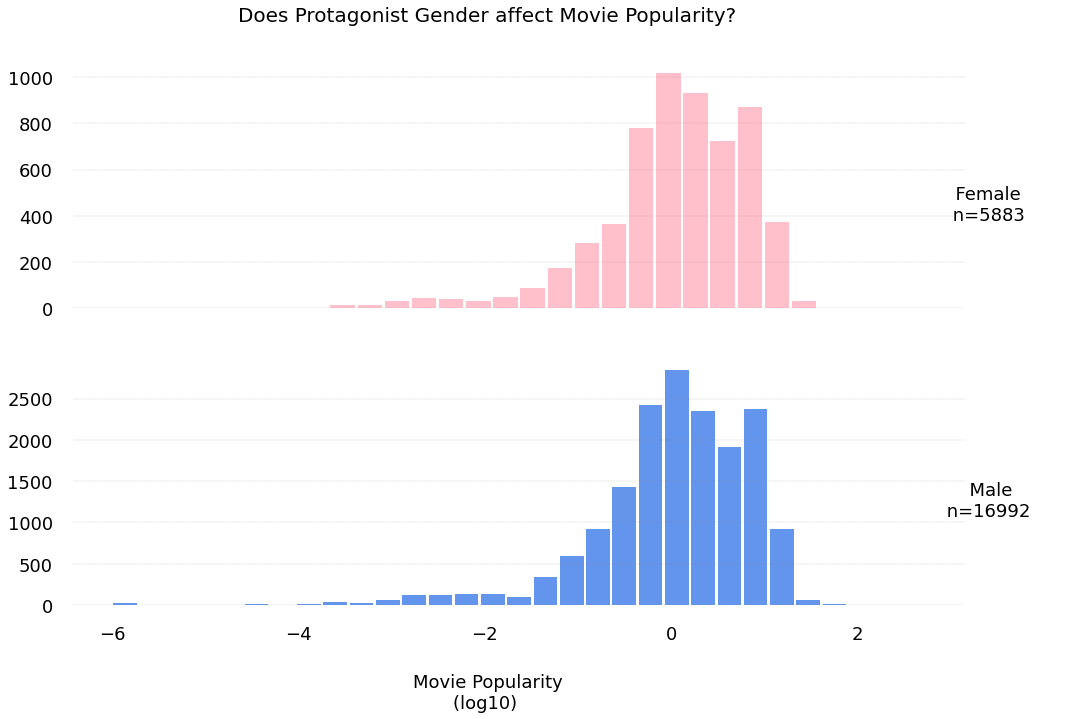

In [ ]:
f,[ax_hist1,ax_hist2] = plt.subplots(2, figsize = (16,10), sharex = True, gridspec_kw = {'height_ratios':[0.5,0.5]})

ax_hist1.set_title('Does Protagonist Gender affect Movie Popularity?          ', fontsize = 20, pad = 40)
ax_hist2.set_xlabel('Movie Popularity           \n(log10)            ', fontsize = 18, labelpad = 30)

bins = 30
ax_hist1.hist(data1_log, bins = bins, rwidth = 0.9, color = 'pink')
[ax_hist1.spines[i].set_visible(False) for i in ax_hist1.spines]
ax_hist1.tick_params(size = 0, labelsize = 18, pad = 20)
ax_hist1.set_ylabel('          Female         \n n=5883', fontsize = 18, labelpad = 20, rotation = 0)
ax_hist1.yaxis.set_label_position("right")

ax_hist2.hist(data2_log, bins = bins, rwidth = 0.9, color = 'cornflowerblue')
[ax_hist2.spines[i].set_visible(False) for i in ax_hist2.spines]
ax_hist2.tick_params(size = 0, labelsize = 18, pad = 20)
ax_hist2.set_ylabel('          Male        \n n=16992', fontsize = 18, labelpad = 20, rotation = 0)
ax_hist2.yaxis.set_label_position("right")

ax_hist1.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.2)
ax_hist2.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

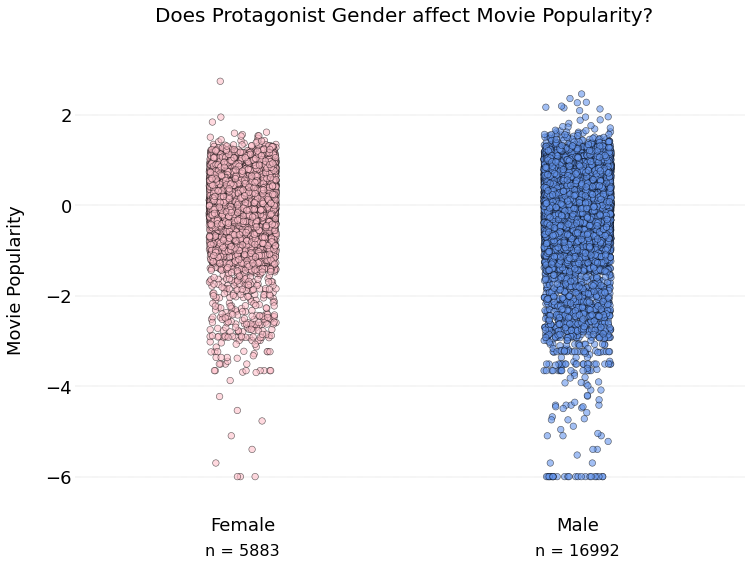

In [ ]:
plt.figure(figsize = [12, 8])
colors = ['pink','cornflowerblue']
ax = sns.stripplot(data = [data1_log, data2_log],
             palette = colors, alpha = 0.6, edgecolor = 'k', linewidth = 0.6,
                  size = 6.5)
[ax.spines[i].set_visible(False) for i in ax.spines]
#ax.set_ylim([0,250])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Female'
labels[1] = 'Male'
ax.set_xticklabels(labels)
ax.tick_params(axis = 'x', labelsize = 18, pad = 20)
plt.tick_params(size = 0, labelsize = 18)
n_rows = [0,1]
counts = [num_fem, num_mal]
for i in n_rows:
    ax.text(i,-7.75, 'n = ' + str(counts[i]), fontsize = 16,
           horizontalalignment = 'center')
    #ax.text(i,-35, 'n = ' + str(counts[i]), fontsize = 16,
           #horizontalalignment = 'center')
title = "Does Protagonist Gender affect Movie Popularity?  "
ax.set_title(title, fontsize = 20, pad = 40)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.2)
plt.ylabel('Movie Popularity', fontsize = 18, labelpad = 20)
filename = 'Popularity.png'
#plt.savefig(filename, bbox_inches = 'tight')
plt.show()

In [ ]:
fem_budg = data_fem['scaled_budget'].tolist()
mal_budg = data_mal['scaled_budget'].tolist()

In [ ]:
fem_budg = [i for i in fem_budg if i != 0]

In [ ]:
mal_budg = [i for i in mal_budg if i != 0]

In [ ]:
fem_budg_log = np.log10(fem_budg)
mal_budg_log = np.log10(mal_budg)

In [ ]:
num_bfem = len(fem_budg)
num_bmal = len(mal_budg)

In [ ]:
num_bfem

1159

In [ ]:
num_bmal

3724

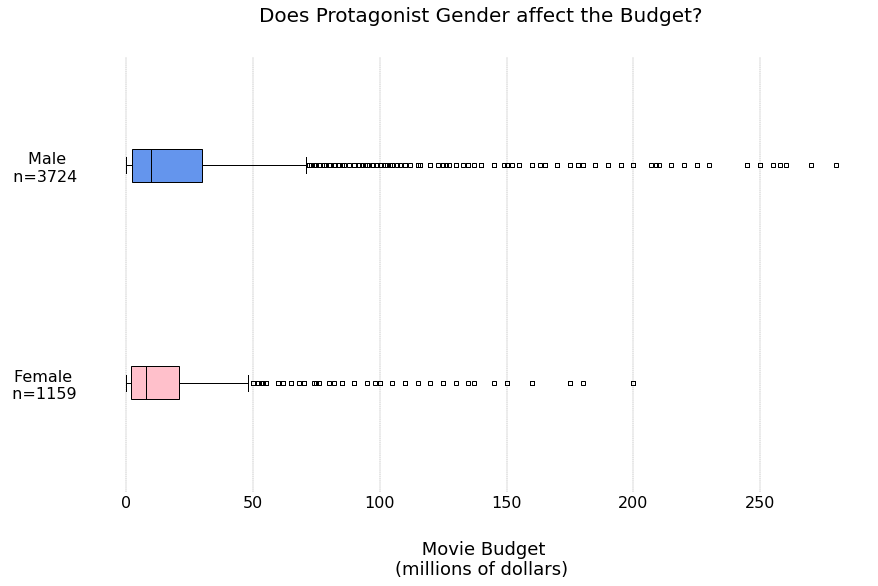

In [ ]:
title = "Does Protagonist Gender affect the Budget?"
values = [fem_budg, mal_budg]
labels = ['Female   \n n=1159  ','Male    \n n=3724  ']
xlabel = ' Movie Budget\n(millions of dollars)'
filename = 'Budget.png'

fig, ax = plt.subplots(figsize=(14, 8))

# box plot
bplot = ax.boxplot(values, labels = labels, vert = False, patch_artist = True, flierprops=dict(marker='s', markersize=4))

# fill with colors
colors = ['pink', 'cornflowerblue']
for patch, color in zip(bplot['boxes'], colors):
  patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

# ax
ax.set_title(title, fontsize = 20, pad = 35)
ax.set_xlabel(xlabel, fontsize = 18, labelpad = 30)
#ax.set_xlim([0,300])
ax.grid(axis = 'x', color = 'black', linewidth = 0.2, linestyle = '-.')
ax.tick_params(axis = 'x', size = 0, labelsize = 16)
ax.tick_params(axis = 'y', size = 0, labelsize = 16)
[ax.spines[i].set_visible(False) for i in ax.spines]
#plt.savefig(filename, bbox_inches = 'tight')
plt.show()

In [ ]:
fem_rev = data_fem['revenue'].tolist()
mal_rev = data_mal['revenue'].tolist()

In [ ]:
fem_rev = [i for i in fem_rev if i != 0]
mal_rev = [i for i in mal_rev if i != 0]

In [ ]:
num_rfem = len(fem_rev)
num_rmal = len(mal_rev)

In [ ]:
num_rfem

994

In [ ]:
num_rmal

3215

In [ ]:
fem_rev_log = np.log10(fem_rev)
mal_rev_log = np.log10(mal_rev)

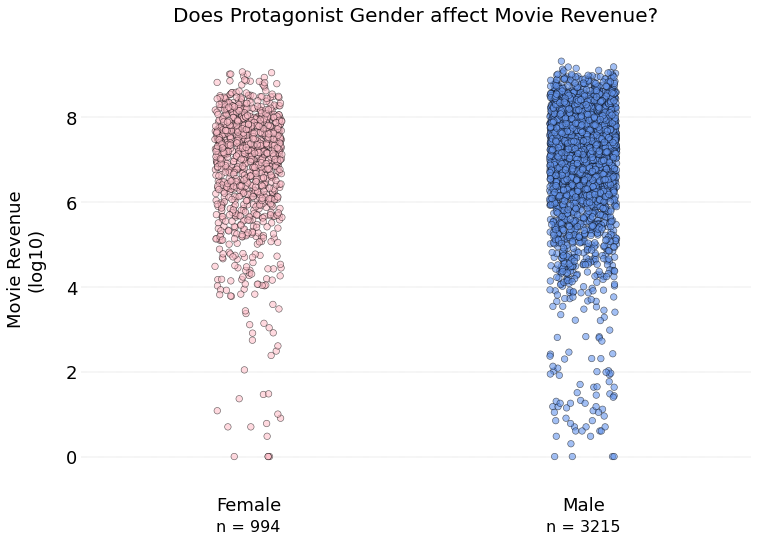

In [ ]:
plt.figure(figsize = [12, 8])
colors = ['pink','cornflowerblue']
ax = sns.stripplot(data = [fem_rev_log, mal_rev_log],
             palette = colors, alpha = 0.6, edgecolor = 'k', linewidth = 0.6,
                  size = 6.5)
[ax.spines[i].set_visible(False) for i in ax.spines]
#ax.set_ylim([0,250])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Female'
labels[1] = 'Male'
ax.set_xticklabels(labels)
ax.tick_params(axis = 'x', labelsize = 18, pad = 20)
plt.tick_params(size = 0, labelsize = 18)
n_rows = [0,1]
counts = [num_rfem, num_rmal]
for i in n_rows:
    ax.text(i,-1.75, 'n = ' + str(counts[i]), fontsize = 16,
           horizontalalignment = 'center')
    #ax.text(i,-35, 'n = ' + str(counts[i]), fontsize = 16,
           #horizontalalignment = 'center')
title = "Does Protagonist Gender affect Movie Revenue?"
ax.set_title(title, fontsize = 20, pad = 20)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.2)
plt.ylabel('Movie Revenue\n(log10)', fontsize = 18, labelpad = 20)
filename = 'Popularity.png'
#plt.savefig(filename, bbox_inches = 'tight')
plt.show()

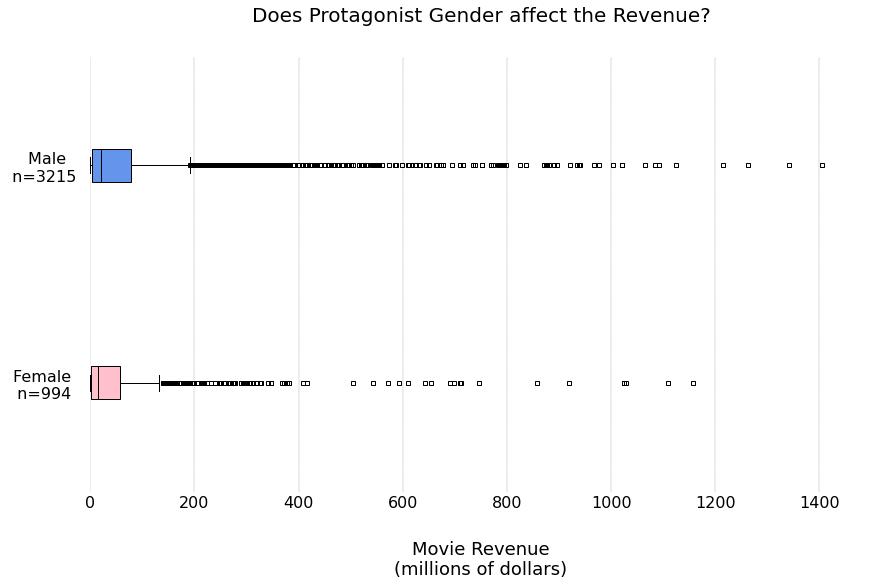

In [ ]:
#boxplots are too squished
title = "Does Protagonist Gender affect the Revenue?"
values = [fem_rev, mal_rev]
labels = ['Female   \n n=994   ','Male    \n n=3215  ']
xlabel = 'Movie Revenue\n(millions of dollars)'
filename = 'Revenue.png'

fig, ax = plt.subplots(figsize=(14, 8))

# box plot
bplot = ax.boxplot(values, labels = labels, vert = False, patch_artist = True, flierprops=dict(marker='s', markersize=4))

# fill with colors
colors = ['pink', 'cornflowerblue']
for patch, color in zip(bplot['boxes'], colors):
  patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

# ax
ax.set_title(title, fontsize = 20, pad = 35)
ax.set_xlabel(xlabel, fontsize = 18, labelpad = 30)
ax.set_xlim([0,1500])
ax.grid(axis = 'x', color = 'black', linewidth = 0.2, linestyle = '-.')
ax.tick_params(axis = 'x', size = 0, labelsize = 16)
ax.tick_params(axis = 'y', size = 0, labelsize = 16)
[ax.spines[i].set_visible(False) for i in ax.spines]
#plt.savefig(filename, bbox_inches = 'tight')
plt.show()

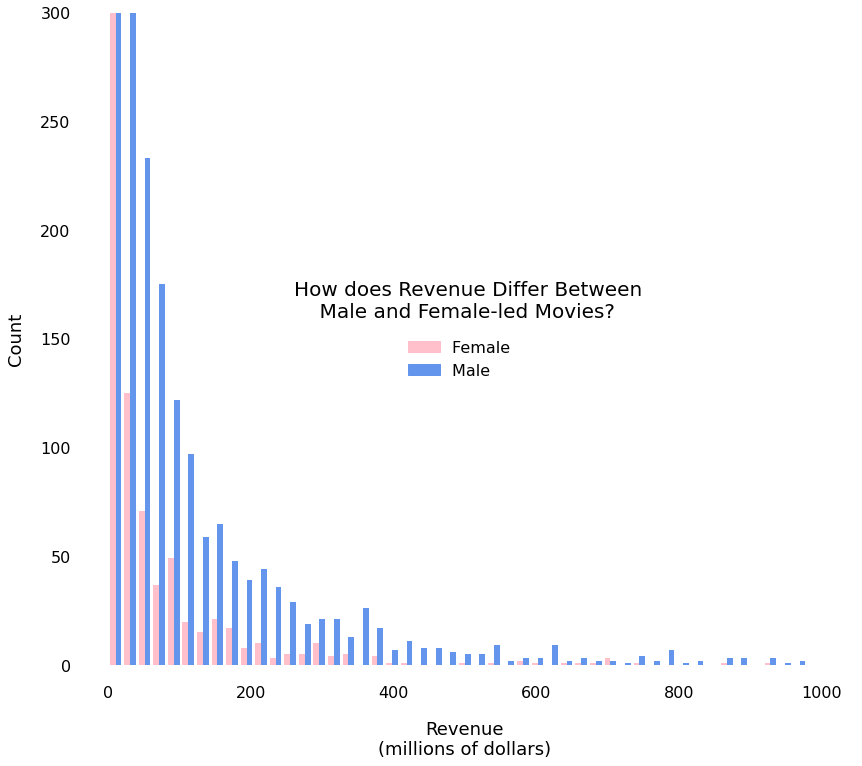

In [ ]:
#This plot is misleading
colors = ['pink','cornflowerblue']
fem = fem_rev
mal = mal_rev
bins = np.linspace(0, 1000, 50)

fig, ax = plt.subplots(figsize=(14,12))
ax.hist([fem,mal], label=['Female', 'Male'], color=colors, bins=bins)
ax.set_ylim(0,300)
ax.set_ylabel("Count", fontsize = 18, labelpad = 15)
ax.set_xlabel('Revenue\n(millions of dollars)', fontsize = 18, labelpad = 20)
ax.tick_params(axis = 'x', size = 0, labelsize = 16, pad = 20)
ax.tick_params(axis = 'y', size = 0, labelsize = 16)
[ax.spines[i].set_visible(False) for i in ax.spines]

a = mpatches.Patch(color = colors[0], alpha = 1, label = labels[0])
b = mpatches.Patch(color = colors[1], alpha = 1, label = labels[1])
artists = [a, b]
plt.legend(handles = artists, labels = labels, fontsize = 16, markerfirst = True, bbox_to_anchor = [0.59, 0.52], frameon = False)

t = plt.text(260,160, "How does Revenue Differ Between\n    Male and Female-led Movies?", fontsize = 20)
t.set_bbox(dict(facecolor = 'white', alpha=0.5,edgecolor='white'))

plt.show()

In [ ]:
data_fem

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget,scaled_revenue,protagonist_gender
2,2,0,Romance;Comedy,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",US;,1995-12-22,0.0,101.0,English,Grumpier Old Men,6.5,92.0,0.0,0.000000,female
14,14,98000000,Action;Adventure,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...",FR;DE;IT;US;,1995-12-22,10017322.0,119.0,English;Latin,Cutthroat Island,5.7,137.0,98.0,10.017322,female
27,27,0,Drama;Romance,en,Persuasion,This film adaptation of Jane Austen's last nov...,2.228434,"[{'name': 'BBC Films', 'id': 288}]",GB;FR;,1995-09-27,0.0,104.0,English,Persuasion,7.4,36.0,0.0,0.000000,female
30,30,0,Drama;Crime,en,Dangerous Minds,Former Marine Louanne Johnson lands a gig teac...,9.481338,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",US;,1995-08-11,180000000.0,99.0,English,Dangerous Minds,6.4,249.0,0.0,180.000000,female
37,38,12000000,Comedy;Drama;Romance,en,Clueless,"Shallow, rich and socially successful Cher is ...",9.882383,"[{'name': 'Paramount Pictures', 'id': 4}]",US;,1995-07-19,0.0,97.0,Español;English,Clueless,6.9,828.0,12.0,0.000000,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44400,45440,0,Drama;Family;TV,en,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,[],CA;,2007-01-08,0.0,89.0,English,To Be Fat Like Me,5.0,12.0,0.0,0.000000,female
44401,45441,0,Comedy,en,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,4.392389,"[{'name': 'Walt Disney Television', 'id': 670}...",CA;US;,2002-03-07,0.0,101.0,English,Cadet Kelly,5.2,145.0,0.0,0.000000,female
44413,45453,0,Crime;Drama;Thriller,hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,"[{'name': 'Mad Films', 'id': 82459}, {'name': ...",IN;,2017-07-07,0.0,146.0,हिन्दी,Mom,6.6,14.0,0.0,0.000000,female
44419,45459,0,Science,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]",US;,1995-01-01,0.0,85.0,English,Caged Heat 3000,3.5,1.0,0.0,0.000000,female


In [ ]:
data_fem['protagonist_gender']='female'

In [ ]:
data_mal

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget,scaled_revenue,protagonist_gender
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,30.0,373.554033,male
4,4,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",US;,1995-02-10,76578911.0,106.0,English,Father of the Bride Part II,5.7,173.0,0.0,76.578911,male
5,5,60000000,Action;Crime;Drama;Thriller,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",US;,1995-12-15,187436818.0,170.0,English;Español,Heat,7.7,1886.0,60.0,187.436818,male
8,8,35000000,Action;Adventure;Thriller,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",US;,1995-12-22,64350171.0,106.0,English,Sudden Death,5.5,174.0,35.0,64.350171,male
11,11,0,Comedy;Horror,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",FR;US;,1995-12-22,0.0,88.0,English;Deutsch,Dracula: Dead and Loving It,5.7,210.0,0.0,0.000000,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44410,45450,0,Fantasy;Action;Thriller,fr,L'Homme orchestre,A band-leader has arranged seven chairs for th...,1.109068,"[{'name': 'Star Film Company', 'id': 45867}]",FR;,1900-01-01,0.0,1.0,No,The One-Man Band,6.5,22.0,0.0,0.000000,male
44415,45455,0,NaN,it,San Michele aveva un gallo,Sentenced to life imprisonment for illegal act...,0.225051,[],NaN,1972-01-01,0.0,90.0,Italiano,St. Michael Had a Rooster,6.0,3.0,0.0,0.000000,male
44416,45456,0,Horror;Mystery;Thriller,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,0.222814,"[{'name': 'Universal Pictures', 'id': 33}]",US;,1946-03-29,0.0,65.0,English,House of Horrors,6.3,8.0,0.0,0.000000,male
44421,45462,0,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",PH;,2011-11-17,0.0,360.0,NaN,Century of Birthing,9.0,3.0,0.0,0.000000,male


In [ ]:
data_mal['protagonist_gender']='male'

In [ ]:
prot_added = pd.concat([data_mal, data_fem])
prot_added

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget,scaled_revenue,protagonist_gender
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,30.0,373.554033,male
4,4,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",US;,1995-02-10,76578911.0,106.0,English,Father of the Bride Part II,5.7,173.0,0.0,76.578911,male
5,5,60000000,Action;Crime;Drama;Thriller,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",US;,1995-12-15,187436818.0,170.0,English;Español,Heat,7.7,1886.0,60.0,187.436818,male
8,8,35000000,Action;Adventure;Thriller,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",US;,1995-12-22,64350171.0,106.0,English,Sudden Death,5.5,174.0,35.0,64.350171,male
11,11,0,Comedy;Horror,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",FR;US;,1995-12-22,0.0,88.0,English;Deutsch,Dracula: Dead and Loving It,5.7,210.0,0.0,0.000000,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44400,45440,0,Drama;Family;TV,en,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,[],CA;,2007-01-08,0.0,89.0,English,To Be Fat Like Me,5.0,12.0,0.0,0.000000,female
44401,45441,0,Comedy,en,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,4.392389,"[{'name': 'Walt Disney Television', 'id': 670}...",CA;US;,2002-03-07,0.0,101.0,English,Cadet Kelly,5.2,145.0,0.0,0.000000,female
44413,45453,0,Crime;Drama;Thriller,hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,"[{'name': 'Mad Films', 'id': 82459}, {'name': ...",IN;,2017-07-07,0.0,146.0,हिन्दी,Mom,6.6,14.0,0.0,0.000000,female
44419,45459,0,Science,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]",US;,1995-01-01,0.0,85.0,English,Caged Heat 3000,3.5,1.0,0.0,0.000000,female


In [ ]:
prot_added

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget,scaled_revenue,protagonist_gender
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,30.0,373.554033,male
4,4,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",US;,1995-02-10,76578911.0,106.0,English,Father of the Bride Part II,5.7,173.0,0.0,76.578911,male
5,5,60000000,Action;Crime;Drama;Thriller,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",US;,1995-12-15,187436818.0,170.0,English;Español,Heat,7.7,1886.0,60.0,187.436818,male
8,8,35000000,Action;Adventure;Thriller,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",US;,1995-12-22,64350171.0,106.0,English,Sudden Death,5.5,174.0,35.0,64.350171,male
11,11,0,Comedy;Horror,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",FR;US;,1995-12-22,0.0,88.0,English;Deutsch,Dracula: Dead and Loving It,5.7,210.0,0.0,0.000000,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44400,45440,0,Drama;Family;TV,en,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,[],CA;,2007-01-08,0.0,89.0,English,To Be Fat Like Me,5.0,12.0,0.0,0.000000,female
44401,45441,0,Comedy,en,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,4.392389,"[{'name': 'Walt Disney Television', 'id': 670}...",CA;US;,2002-03-07,0.0,101.0,English,Cadet Kelly,5.2,145.0,0.0,0.000000,female
44413,45453,0,Crime;Drama;Thriller,hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,"[{'name': 'Mad Films', 'id': 82459}, {'name': ...",IN;,2017-07-07,0.0,146.0,हिन्दी,Mom,6.6,14.0,0.0,0.000000,female
44419,45459,0,Science,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]",US;,1995-01-01,0.0,85.0,English,Caged Heat 3000,3.5,1.0,0.0,0.000000,female


In [ ]:
prot_added = prot_added[prot_added.scaled_budget != 0]
prot_added = prot_added[prot_added.scaled_revenue != 0]
prot_added

,Unnamed: 0,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,scaled_budget,scaled_revenue,protagonist_gender
0,0,30000000,Animation;Comedy;Family,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",US;,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,30.0,373.554033,male
5,5,60000000,Action;Crime;Drama;Thriller,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",US;,1995-12-15,187436818.0,170.0,English;Español,Heat,7.7,1886.0,60.0,187.436818,male
8,8,35000000,Action;Adventure;Thriller,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",US;,1995-12-22,64350171.0,106.0,English,Sudden Death,5.5,174.0,35.0,64.350171,male
13,13,44000000,History;Drama,en,Nixon,An all-star cast powers this epic look at Amer...,5.092000,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",US;,1995-12-22,13681765.0,192.0,English,Nixon,7.1,72.0,44.0,13.681765,male
17,17,4000000,Crime;Comedy,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,"[{'name': 'Miramax Films', 'id': 14}, {'name':...",US;,1995-12-09,4300000.0,98.0,English,Four Rooms,6.5,539.0,4.0,4.300000,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42239,43156,60000000,Adventure;Animation;Comedy;Family,en,Smurfs: The Lost Village,"In this fully animated, all-new take on the Sm...",16.972835,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",US;,2017-03-23,197183546.0,89.0,العربية;English,Smurfs: The Lost Village,6.2,311.0,60.0,197.183546,female
42313,43233,42000000,Action;Comedy,en,Snatched,"When her boyfriend dumps Emily, a spontaneous ...",11.214779,[{'name': 'Twentieth Century Fox Film Corporat...,US;,2017-05-03,60845711.0,90.0,English;Português;Español,Snatched,5.2,207.0,42.0,60.845711,female
42318,43238,125000000,Thriller;Action;Adventure,en,The Mummy,Though safely entombed in a crypt deep beneath...,33.704935,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",US;,2017-06-06,407778013.0,110.0,العربية;English;ภาษาไทย,The Mummy,5.4,2122.0,125.0,407.778013,female
43301,44282,21000000,Drama;Thriller,en,Kidnap,Single mother Karla McCoy lives a perfect life...,20.214579,"[{'name': 'Ingenious Media', 'id': 290}, {'nam...",GB;US;,2017-08-04,24527158.0,95.0,English,Kidnap,6.0,244.0,21.0,24.527158,female


In [ ]:
rev = prot_added['scaled_revenue'].tolist()
popu = prot_added['popularity'].tolist()
bud = prot_added['scaled_budget'].tolist()

In [ ]:
prot = prot_added['protagonist_gender'].tolist()

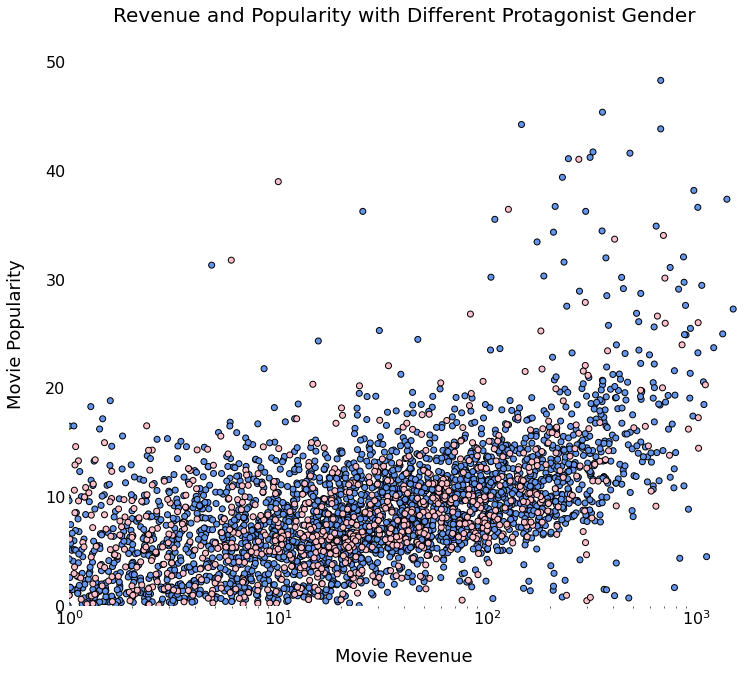

In [ ]:
#this has potential
labels = ['Male','Female']
fig = plt.figure(figsize=(12, 10))
plt.scatter(rev, popu,
           linewidths=1, alpha=1,
           edgecolor='k', cmap = colors.ListedColormap(['pink', 'cornflowerblue']), c=prot_added.protagonist_gender.astype('category').cat.codes)
ax = plt.gca()
plt.ylabel('Movie Popularity', fontsize = 18, labelpad = 20)
plt.xlabel('Movie Revenue', fontsize = 18, labelpad = 20)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.set_ylim([0,50])
#ax.set_ylim([10, 1000])
#ax.set_xlim([0,1500])
ax.set_xlim([1, 1600])
ax.set_xscale("log")
#ax.set_yscale("log")
#ax.set_yticklabels(['', 50,100,150,200,250,300])
ax.tick_params(size = 0, labelsize = 16)
title = "Revenue and Popularity with Different Protagonist Gender"
ax.set_title(title, fontsize = 20, pad = 40)
plt.show()